In [27]:
import numpy as np
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10_000)

In [4]:
# El objetivo es entrenar para interpretar estas noticias reuters...
# Están clasificadas en 46 categorías (single-label multi class) de 0 4 45
max(train_labels)

45

In [6]:
# Los datos para entrenar son 8982
# Los datos para luego testear la red son 2246
len(train_data), len(test_data)

(8982, 2246)

In [7]:
# Los mensajes están codificados como antes, cada mensajes es realmente una lista con enteros... donde cada
# enteros es el índice de la palabra en un diccionario de palabras... las que tienen número más bajo son las
# que más se repiten... nosotros cargamos la lista con las 10_000 más probables

In [9]:
train_data[0]  # este es el mensaje 0

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [19]:
# Podemos recuperaarlo...
word_index = reuters.get_word_index()
index_to_word: dict = {value: key for key, value in word_index.items()}
from typing import List
def integer_to_text(int_mensaje: List[int]) -> str:
    mensaje = []
    for entero in int_mensaje:
        mensaje.append(index_to_word.get(entero - 3, '?'))
    return ' '.join(mensaje)

In [20]:
integer_to_text(train_data[0])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [22]:
integer_to_text(train_data[141])

"? jacobs ? ag lt ? z hopes for another excellent year in 1987 after a 27 pct increase in 1986 net profit results in the first few months show it heading in the right direction company president ? jacobs said the group reported 1986 net profit of 190 9 mln swiss francs compared with 150 4 mln in 1985 and raised its dividend per bearer share to 160 francs from 155 francs jacobs said the increase in profit which far exceeded the company's target of five pct real annual growth had been made possible by restructuring measures introduced in january 1986 which had also made some major acquisitions possible last year hermann ? general director in charge of economic affairs said the 2 7 pct decline in group turnover to 5 24 billion francs was due to currency factors a 5 2 pct negative currency influence was partially offset by growth in operations and by structural changes within the group turnover in the coffee business fell to 3 10 billion francs from 3 56 billion in 1985 while turnover in t

In [23]:
# Preparación de los datos...
# Las labels son enteros 0 hasta 46...
# Podemos codificar cada respuesta como un tensor entero, con la técnica del one.hot.encoding como antes...
# Esto se llama CATEGORICAL ENCODING... por ejemplo si la respuesta es 6 el label transformado sería
# (0, 0, 0, 0, 0, 0, 1, 0, 0 .......) o sea, un vector de enteros... de 46 componentes, donde todas son 0 excepto la 6ª compon. que vale 1

In [34]:
# Lo podemos hacer manualmente...
def to_one_hot(labels: np.ndarray, dimension=46) -> np.ndarray:
    respuesta = np.zeros((len(labels), dimension))
    for index, label in enumerate(labels):
        respuesta[index, label] = 1
    return respuesta

In [38]:
test_labels[3]

4

In [37]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [39]:
y_test[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
# Observar que ya hay una función en tensorflow que hace esto automáticamente...
# o sea, si tenemos un entero, lo transforma en un vector de todo 0, excepto la componente con el valor
# que toma el valor 1
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [41]:
y_test[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [43]:
# COn respecto a los samples, podemos vectorizarlos exactamente igual que antes...
# Para cada sample o mensaje, creamos un vector de 10-000 componentes, todo 
# ceros, en los índices de las palabaras... ahí le ponemos un 1...
# Una vaiación sería poner += 1
def vectorize_sequences(reviews: List[int], dimension=10_000) -> np.ndarray:
    results = np.zeros((len(reviews), dimension))
    for i, review in enumerate(reviews):
        for indice_palabra in review:
            results[i, indice_palabra] = 1
            # results[i, indice_palabra] += 1
    return results

In [46]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [45]:
# Este modelo no valdía con capas de 16 neuronas... ya que cada layer realmente es una transformación
# de un espacio de tensores de dimension la del input, a una dimension de salida...
# con lo que si hay pocas neuronas, se perdería información...
# utilizaremos layers de 64 neuronas

In [48]:
from tensorflow import keras
from tensorflow.keras import layers

In [49]:
model = keras.Sequential([
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(46, activation="softmax"),  # La de salida son el número de categorías...
])

In [50]:
# Softmax como salida lo que hace es asociar una probabilidad a cada una de las 46 clases, de forma que la suma sea 1
# Para estos casos, la mejor función de error es la cross_entropy que nos calcula como el error cometido
# cuando se asocia una probabilidad en lugar de otra conocida...

In [51]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [52]:
# Como antes, apartamos 1000 samples del set de training para hacer la validación
# y así poder estimar cuando ocurre el overfitting (en qué epoch)

In [53]:
x_val = x_train[:1_000]
y_val = y_train[:1_000]
x_partial_train = x_train[1_000:]
y_partial_train = y_train[1_000:]

In [54]:
len(x_val), len(y_val), len(x_partial_train), len(y_partial_train)

(1000, 1000, 7982, 7982)

In [57]:
# Hagamos el entreno para 20 epochs a ver...
history = model.fit(x_partial_train, y_partial_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 46ms/step - loss: 2.5259 - accuracy: 0.5431 - val_loss: 1.6784 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 1.3553 - accuracy: 0.7129 - val_loss: 1.2876 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 1s 31ms/step - loss: 1.0130 - accuracy: 0.7830 - val_loss: 1.1153 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 0s 31ms/step - loss: 0.7993 - accuracy: 0.8290 - val_loss: 1.0215 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 30ms/step - loss: 0.6360 - accuracy: 0.8656 - val_loss: 0.9541 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 1s 31ms/step - loss: 0.5089 - accuracy: 0.8955 - val_loss: 0.9202 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 0s 30ms/step - loss: 0.4093 - accuracy: 0.9159 - val_loss: 0.9326 - val_accuracy: 0.8000
Epoch 8/20
16

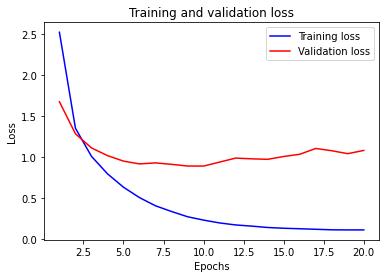

In [61]:
import matplotlib.pyplot as plt
history_dictionary = history.history
plt.plot(range(1, 21), history_dictionary['loss'], 'blue', label="Training loss")
plt.plot(range(1, 21), history_dictionary['val_loss'], 'red', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

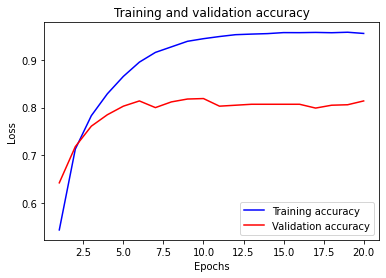

In [62]:
plt.plot(range(1, 21), history_dictionary['accuracy'], 'blue', label="Training accuracy")
plt.plot(range(1, 21), history_dictionary['val_accuracy'], 'red', label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [63]:
# Parece que después de 9 o 10 epochs hay overfitting!!!

In [65]:
# Hagamos el modelo de nuevo desde 0 y entrenémoslo con 9 epochs...
model = keras.Sequential([
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(46, activation="softmax"),  # La de salida son el número de categorías...
])
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 27ms/step - loss: 2.4923 - accuracy: 0.5490
Epoch 2/9
18/18 [==============================] - 1s 28ms/step - loss: 1.3529 - accuracy: 0.7188
Epoch 3/9
18/18 [==============================] - 0s 28ms/step - loss: 1.0103 - accuracy: 0.7889
Epoch 4/9
18/18 [==============================] - 0s 27ms/step - loss: 0.7966 - accuracy: 0.8294
Epoch 5/9
18/18 [==============================] - 1s 28ms/step - loss: 0.6369 - accuracy: 0.8627
Epoch 6/9
18/18 [==============================] - 0s 28ms/step - loss: 0.5046 - accuracy: 0.8931
Epoch 7/9
18/18 [==============================] - 1s 28ms/step - loss: 0.4071 - accuracy: 0.9132
Epoch 8/9
18/18 [==============================] - 0s 27ms/step - loss: 0.3323 - accuracy: 0.9256
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9699 - accuracy: 0.7845


In [68]:
# Otra forma distinta de codificar las labels en el modelo...
# Ya hicimos ahora el one-hot-encoding...
# también podíamos haber hecho...
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# Lo único que necesitaríamos cambiar, es la función para evaluar la pérdida...
# sparse_categorical_crossentropy en vez de  categorical_crossentropy
# Realmente la función hace lo mismo, pero en la de antes actuaba comprando con un vector de probabildiades
# y ahora con un número que nos indica la clase a la que pertenece (podría ser, por ejemplo 42.57)
model = keras.Sequential([
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(46, activation="softmax"),  # La de salida son el número de categorías...
])
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 30ms/step - loss: 2.4634 - accuracy: 0.5275
Epoch 2/9
18/18 [==============================] - 1s 29ms/step - loss: 1.3300 - accuracy: 0.7271
Epoch 3/9
18/18 [==============================] - 1s 29ms/step - loss: 0.9893 - accuracy: 0.7901
Epoch 4/9
18/18 [==============================] - 1s 34ms/step - loss: 0.7789 - accuracy: 0.8344
Epoch 5/9
18/18 [==============================] - 1s 28ms/step - loss: 0.6122 - accuracy: 0.8758
Epoch 6/9
18/18 [==============================] - 1s 30ms/step - loss: 0.4904 - accuracy: 0.9005
Epoch 7/9
18/18 [==============================] - 1s 28ms/step - loss: 0.3922 - accuracy: 0.9181
Epoch 8/9
18/18 [==============================] - 1s 28ms/step - loss: 0.3218 - accuracy: 0.9322
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9525 - accuracy: 0.7956
